In [1]:
           # Data processing
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import re

# Data visulization
import matplotlib as mpl
import matplotlib.pyplot as plt

import process as pr

dualgnn, dragon은 user_graph_dict.npy라는 파일이 필요함. baby에는 있는데 나머지에는 없음

baby - baby.inter, i_id_mapping.csv, image_feat.npy, text_feat.npy, u_id_mapping.csv, user_graph_dict.npy

clothging - clothing.inter, i_id_mapping.csv, image_feat.npy, text_feat.npy, u_id_mapping.csv

elec - elec.iter, image_feat.npy, text_feat.npy

In [3]:
import numpy as np

"""
# .npy 파일 경로
file_path = '/home/sh0408sh/workspace/MMRec/data/baby/user_graph_dict.npy'

# .npy 파일 읽기
data = np.load(file_path, allow_pickle=True)

# 데이터 확인
print(data)
print("배열의 형태:", data.shape) # (7050, 4096) - 7050개의 item image feature embedding(dimension = 4096)
print("배열의 데이터 타입:", data.dtype)
"""

'\n# .npy 파일 경로\nfile_path = \'/home/sh0408sh/workspace/MMRec/data/baby/user_graph_dict.npy\'\n\n# .npy 파일 읽기\ndata = np.load(file_path, allow_pickle=True)\n\n# 데이터 확인\nprint(data)\nprint("배열의 형태:", data.shape) # (7050, 4096) - 7050개의 item image feature embedding(dimension = 4096)\nprint("배열의 데이터 타입:", data.dtype)\n'

In [6]:
models = ['BM3','FREEDOM','GRCN','ItemKNNCBF', 'LATTICE','LayerGCN','MMGCN','MGCN','MVGAE','SELFCFED_LGN','SLMRec','VBPR']
log_names = ['BM3-clothing-Aug-05-2024-11-40-19.log',
             'FREEDOM-clothing-Aug-05-2024-20-15-05.log',
             'GRCN-clothing-Aug-06-2024-10-23-33.log',
             'ItemKNNCBF-clothing-Aug-06-2024-20-03-17.log',
             'LATTICE-clothing-Aug-06-2024-20-05-30.log',
             'LayerGCN-clothing-Aug-07-2024-16-19-17.log',
             'MMGCN-clothing-Aug-08-2024-13-38-28.log',
             'MGCN-clothing-Aug-08-2024-09-47-42.log',
             'MVGAE-clothing-Aug-09-2024-15-29-48.log',
             'SELFCFED_LGN-clothing-Aug-10-2024-16-44-54.log',
             'SLMRec-clothing-Aug-14-2024-18-07-21.log',
             'VBPR-clothing-Aug-19-2024-10-32-23.log']

In [7]:
l = []
data = []

for i in range(len(models)) :
    f = open(log_names[i], "r")
    l.append(f.readlines())
    f. close()

    data.append(pr.splitor(l[i])[-1])

In [8]:
df = pd.DataFrame()
for i in range(len(models)) :
    best = pr.Best(data[i])
    best['model'] = [models[i], models[i]]
    df = pd.concat([df,best])

df

,seed,n_layers,reg_weight,dropout,recall@5,recall@10,recall@20,recall@50,ndcg@5,ndcg@10,...,type,model,learning_rate,shrink,knn_k,cl_loss,beta,ssl_temp,ssl_alpha,reg
0,999.0,1.0,0.01000,0.3,0.0266,0.0420,0.0628,0.1005,0.0175,0.0225,...,Valid,BM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,1.0,0.01000,0.3,0.0272,0.0425,0.0633,0.0990,0.0182,0.0231,...,Test,BM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,0.00100,0.8,0.0394,0.0625,0.0940,0.1465,0.0258,0.0333,...,Valid,FREEDOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,0.00100,0.8,0.0400,0.0624,0.0927,0.1428,0.0264,0.0336,...,Test,FREEDOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,0.10000,NaN,0.0267,0.0428,0.0670,0.1088,0.0172,0.0224,...,Valid,GRCN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,0.10000,NaN,0.0275,0.0440,0.0672,0.1097,0.0176,0.0229,...,Test,GRCN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,NaN,NaN,0.0112,0.0175,0.0287,0.0429,0.0073,0.0094,...,Valid,ItemKNNCBF,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,NaN,NaN,0.0111,0.0177,0.0294,0.0434,0.0072,0.0094,...,Test,ItemKNNCBF,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,0.00000,NaN,0.0326,0.0500,0.0738,0.1160,0.0215,0.0272,...,Valid,LATTICE,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,999.0,NaN,0.00000,NaN,0.0331,0.0493,0.0732,0.1147,0.0216,0.0269,...,Test,LATTICE,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.set_index(['model', 'type'], inplace = True)
df

seed  n_layers  reg_weight  dropout  recall@5  recall@10  \
model        type                                                               
BM3          Valid  999.0       1.0     0.01000      0.3    0.0266     0.0420   
             Test   999.0       1.0     0.01000      0.3    0.0272     0.0425   
FREEDOM      Valid  999.0       NaN     0.00100      0.8    0.0394     0.0625   
             Test   999.0       NaN     0.00100      0.8    0.0400     0.0624   
GRCN         Valid  999.0       NaN     0.10000      NaN    0.0267     0.0428   
             Test   999.0       NaN     0.10000      NaN    0.0275     0.0440   
ItemKNNCBF   Valid  999.0       NaN         NaN      NaN    0.0112     0.0175   
             Test   999.0       NaN         NaN      NaN    0.0111     0.0177   
LATTICE      Valid  999.0       NaN     0.00000      NaN    0.0326     0.0500   
             Test   999.0       NaN     0.00000      NaN    0.0331     0.0493   
LayerGCN     Valid  999.0       4.0     0.01000      0.2    0.0242     0.0375   
             Test   999.0       4.0     0.01000      0.2    0.0234     0.0368   
MMGCN        Valid  999.0       NaN     0.00100      NaN    0.0128     0.0217   
             Test   999.0       NaN     0.00100      NaN    0.0142     0.0231   
MGCN         Valid  999.0       NaN         NaN      NaN    0.0438     0.0652   
             Test   999.0       NaN         NaN      NaN    0.0430     0.0655   
MVGAE        Valid  999.0       NaN         NaN      NaN    0.0005     0.0019   
             Test   999.0       NaN         NaN      NaN    0.0006     0.0015   
SELFCFED_LGN Valid  999.0       2.0     0.00001      0.2    0.0266     0.0417   
             Test   999.0       2.0     0.00001      0.2    0.0262     0.0415   
SLMRec       Valid  999.0       NaN         NaN      NaN    0.0309     0.0468   
             Test   999.0       NaN         NaN      NaN    0.0296     0.0463   
VBPR         Valid  999.0       NaN     2.00000      NaN    0.0181     0.0279   
             Test   999.0       NaN     2.00000      NaN    0.0190     0.0282   

                    recall@20  recall@50  ndcg@5  ndcg@10  ...  map@20  \
model        type                                          ...           
BM3          Valid     0.0628     0.1005  0.0175   0.0225  ...  0.0179   
             Test      0.0633     0.0990  0.0182   0.0231  ...  0.0184   
FREEDOM      Valid     0.0940     0.1465  0.0258   0.0333  ...  0.0265   
             Test      0.0927     0.1428  0.0264   0.0336  ...  0.0267   
GRCN         Valid     0.0670     0.1088  0.0172   0.0224  ...  0.0178   
             Test      0.0672     0.1097  0.0176   0.0229  ...  0.0179   
ItemKNNCBF   Valid     0.0287     0.0429  0.0073   0.0094  ...  0.0076   
             Test      0.0294     0.0434  0.0072   0.0094  ...  0.0075   
LATTICE      Valid     0.0738     0.1160  0.0215   0.0272  ...  0.0218   
             Test      0.0732     0.1147  0.0216   0.0269  ...  0.0214   
LayerGCN     Valid     0.0558     0.0899  0.0160   0.0203  ...  0.0162   
             Test      0.0559     0.0886  0.0156   0.0199  ...  0.0159   
MMGCN        Valid     0.0370     0.0641  0.0081   0.0109  ...  0.0087   
             Test      0.0359     0.0623  0.0091   0.0120  ...  0.0094   
MGCN         Valid     0.0972     0.1469  0.0286   0.0355  ...  0.0285   
             Test      0.0960     0.1465  0.0285   0.0358  ...  0.0285   
MVGAE        Valid     0.0039     0.0073  0.0003   0.0007  ...  0.0006   
             Test      0.0036     0.0067  0.0003   0.0006  ...  0.0005   
SELFCFED_LGN Valid     0.0627     0.0995  0.0177   0.0226  ...  0.0182   
             Test      0.0616     0.0998  0.0174   0.0224  ...  0.0177   
SLMRec       Valid     0.0697     0.1088  0.0200   0.0251  ...  0.0201   
             Test      0.0698     0.1105  0.0197   0.0252  ...  0.0201   
VBPR         Valid     0.0417     0.0668  0.0123   0.0155  ...  0.0126   
             Test      0.0415     0.0668  0.0128   0.0158  ...  

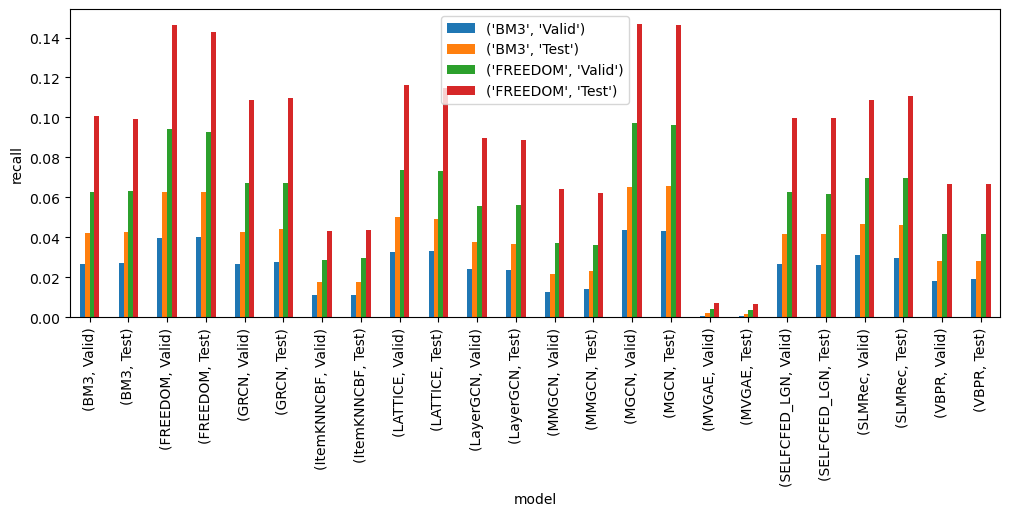

In [10]:
measure = 'recall'
ax= df.loc[:,f'{measure}@5':f'{measure}@50'].plot(kind = 'bar', figsize = (12,4), legend = True)
ax.set_xlabel('model')
ax.set_ylabel(measure)
ax.legend(df.loc[:,f'{measure}@5':f'{measure}@50'].index)